<a href="https://colab.research.google.com/github/Deependrashukla/ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multivariate linear regression :-**  is a statistical technique that establishes a relationship between multiple data variables. It estimates a linear equation that facilitates the analysis of multiple dependent or outcome variables depending on one or more predictor variables.


#                            **Equation: y = <w, x>**

#                             w = (X^TX)^{-1}X^TY



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
class MultivariateLR:
    """
    A class for multivariate linear regression.

    Attributes:
        w: Coefficient vector (initialized to 0).

    Methods:
        - fit(X_train, Y_train): Fits the linear regression model to the training data.
        - predict(X_test): Predicts target values for test data.
        - gradientDescent(X_test, Y_test): Performs gradient descent optimization.
        - coefficients(): Prints the intercept and coefficients of the model.
        - score(Y_actual, Y_predicted): Computes R-squared and other evaluation metrics.

    Usage:
        model = MultivariateLR()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        model.coefficients()
        model.score(Y_test, Y_pred)
    """

    w = 0  # Initialize coefficient vector

    def fit(self, X_train, Y_train):
        """
        Fits the linear regression model to the training data.

        Args:
            X_train: Feature matrix (input data).
            Y_train: Target vector (output data).
        """
        global w
        input_df = X_train.copy()
        input_df.insert(0, "x0", 1)  # Add a column of 1s for the Intercept
        x = np.array([input_df[col] for col in input_df.columns])
        y = np.array([Y_train])

        xt = x.T
        x_xt = x @ xt
        inv_x_xt = np.linalg.inv(x_xt)
        sum_xy = x @ y.T

        w = inv_x_xt @ sum_xy

    def predict(self, X_test):
        """
        Predicts target values for test data.

        Args:
            X_test: Feature matrix for test data.

        Returns:
            y_predicted: Predicted target values.
        """
        input_df = X_test.copy()
        input_df.insert(0, "x0", 1)
        x = np.array([input_df[col] for col in input_df.columns])
        xt = x.T

        y_predicted = xt @ w
        return y_predicted

    def gradientDescent(self, X_test, Y_test):
        """
        Performs gradient descent optimization.

        Args:
            X_test: Feature matrix for test data.
            Y_test: Target vector for test data.
        """
        global w
        input_df = X_test.copy()
        input_df.insert(0, "x0", 1)
        x = np.array([input_df[col] for col in input_df.columns])
        xt = x.T
        w = np.zeros((1, len(input_df.columns)))
        for i in range(100000):
            gradient = (w @ x - np.array([Y_test])) @ xt
            w = (w - 0.00005 * gradient)

    def coefficients(self):
        """
        Prints the intercept and coefficients of the model.
        """
        print("Intercept is:", w[0][0])
        print("Coefficients are:", w.reshape(1, -1))

    def score(self, Y_actual, Y_predicted):
        """
        Computes R-squared and other evaluation metrics.

        Args:
            Y_actual: Actual target values.
            Y_predicted: Predicted target values.
        """
        Y_actual = np.array([Y_actual]).T
        mse = (((Y_actual - Y_predicted) ** 2) / len(Y_actual)).sum()
        mae = np.mean(np.abs(Y_actual - Y_predicted))

        rss = ((Y_actual - Y_predicted) ** 2).sum()  # Residual sum of squares
        tss = ((Y_actual - Y_actual.sum() / len(Y_actual)) ** 2).sum()  # Total sum of squares
        r_square = (1 - rss / tss)

        print("R-Square Value:", r_square)
        print("MSE Value : ", mse)
        print("MAE Value : ", mae)


In [15]:
def verify_SLR(X_test, Y_test):
  input_df = X_test.copy()
  input_df.insert(0,"x0",1)
  x = np.array([input_df[col] for col in input_df.columns])
  xt = x.T

  model = LinearRegression().fit(xt, np.array(Y_test))
  # check the performance of the model
  y_pred = model.predict(xt)
  r2 = r2_score(Y_test, y_pred)
  print(f"R² score of scikit learn is : {r2:.2f}")

In [16]:
df = pd.read_csv("Data4.csv") #reading csv file
modal = MultivariateLR()
modal.fit(df[['x1', 'x2', 'x3']], df["y"])
yp = modal.predict(df[['x1', 'x2', 'x3']])
print("Coefficients using Numerical Method :- ")
modal.coefficients()
modal.gradientDescent(df[['x1', 'x2', 'x3']], df["y"])
print("Coefficients using Gradient Descent Method :- ")
modal.coefficients()
modal.score(df["y"], yp)
verify_SLR(df[['x1', 'x2', 'x3']], df["y"])

Coefficients using Numerical Method :- 
Intercept is: 13.239477824456117
Coefficients are: [[13.23947782  6.13243763  2.39226554  7.74681038]]
Coefficients using Gradient Descent Method :- 
Intercept is: 13.23947579325089
Coefficients are: [[13.23947579  6.13243433  2.3922683   7.74681094]]
R-Square Value: 0.9841749058943147
MSE Value :  34.62048082924355
MAE Value :  5.155505630378932
R² score of scikit learn is : 0.98


Coefficients using Numerical Method :- 
Intercept is: 5.680787126761226
Coefficients are: [[5.68078713 2.38406007]]
Coefficients using Gradient Descent Method :- 
Intercept is: 5.680787126760829
Coefficients are: [[5.68078713 2.38406007]]
R-Square Value: 0.9579571905586357
MSE Value :  2.078525401777327
MAE Value :  1.2805559784291463
R² score of scikit learn is : 0.96


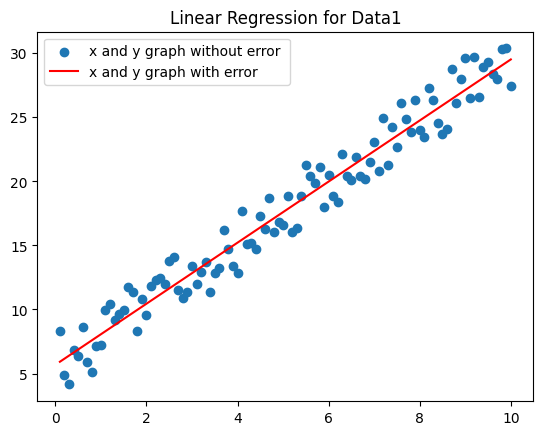

In [17]:
df = pd.read_csv("Data1.csv")
modal = MultivariateLR()
modal.fit(df[['x']], df["y"])
yp = modal.predict(df[['x']])
print("Coefficients using Numerical Method :- ")
modal.coefficients()
modal.gradientDescent(df[['x']], df["y"])
print("Coefficients using Gradient Descent Method :- ")
modal.coefficients()
modal.score(df["y"], yp)
verify_SLR(df[['x']], df["y"])
plt.scatter(df["x"], df['y'], label =  'x and y graph without error ')
plt.plot(df["x"], yp, color = "red", label =  'x and y graph with error ')
plt.title("Linear Regression for Data1")
plt.legend()

Coefficients using Numerical Method :- 
Intercept is: 3.6821226662931816
Coefficients are: [[3.68212267 0.97299745]]
Coefficients using Gradient Descent Method :- 
Intercept is: 3.6821226662929925
Coefficients are: [[3.68212267 0.97299745]]
R-Square Value: 0.9904038522690993
MSE Value :  0.0764334270435197
MAE Value :  0.2349883528902574
R² score of scikit learn is : 0.99


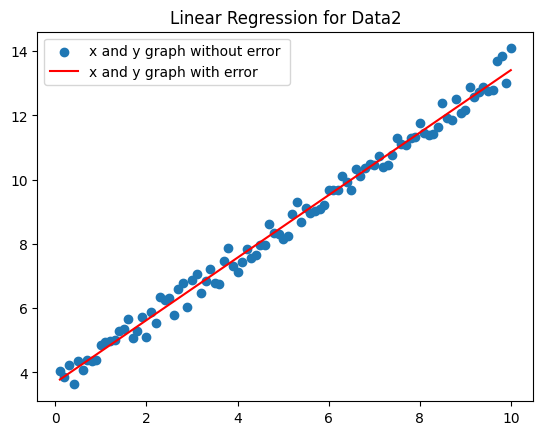

In [29]:
df = pd.read_csv("Data2.csv")
modal = MultivariateLR()
modal.fit(df[['x']], np.log(df["y"]))
yp = modal.predict(df[['x']])
print("Coefficients using Numerical Method :- ")
modal.coefficients()
modal.gradientDescent(df[['x']], np.log(df["y"]))
print("Coefficients using Gradient Descent Method :- ")
modal.coefficients()
modal.score(np.log(df["y"]), (yp))
verify_SLR(df[['x']], np.log(df["y"]))
plt.scatter(df["x"], np.log(df["y"]), label =  'x and y graph without error ')
plt.plot(df["x"], yp, color = "red", label =  'x and y graph with error ')
plt.title("Linear Regression for Data2")
plt.legend()

Coefficients using Numerical Method :- 
Intercept is: 1.1770620783119956
Coefficients are: [[1.17706208 0.09419021]]
Coefficients using Gradient Descent Method :- 
Intercept is: 1.1770620783119032
Coefficients are: [[1.17706208 0.09419021]]
R-Square Value: 0.3136973226728079
MSE Value :  0.16173044143088558
MAE Value :  0.2946779330131036
R² score of scikit learn is : 0.31


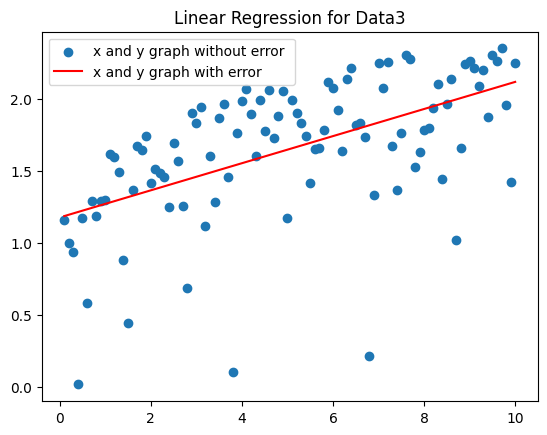

In [19]:
df = pd.read_csv("Data3.csv")
modal = MultivariateLR()
modal.fit(df[['x']], df["z"])
yp = modal.predict(df[['x']])
print("Coefficients using Numerical Method :- ")
modal.coefficients()
modal.gradientDescent(df[['x']], df["z"])
print("Coefficients using Gradient Descent Method :- ")
modal.coefficients()
modal.score(df["z"], yp)
verify_SLR(df[['x']], df["z"])
plt.scatter(df["x"], df['z'], label =  'x and y graph without error ')
plt.plot(df["x"], yp, color = "red", label =  'x and y graph with error ')
plt.title("Linear Regression for Data3")
plt.legend()